In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def MERGE_DAILY(DIRE, FILEN, inp_, save_dir = None, file_name = None):
    
    if inp_ == "xls":
        df_base = pd.read_csv(DIRE + FILEN[0], encoding = "CP949", error_bad_lines=False, sep = '\t')
        
        for i in range(1, len(FILEN)):
            df = pd.read_csv(DIRE + FILEN[i], encoding = "CP949", error_bad_lines=False, sep = '\t')
            df_base = pd.concat([df_base, df])
            print("steps == {}".format(i))
        
            if i == (len(FILEN) - 1):
                print("====================================================")
                print("Total len : {}".format(len(df_base)))
                print("====================PROCESS DONE====================")
        
                if save_dir == None:
                    break

                else:
                    filn = save_dir + file_name
                    df_base.to_csv(filn + ".csv", index = False, encoding = 'CP949')
                    print("File Name : {}".format(filn + ".csv"))
                    print("======================SAVE DONE======================")
                    
                
    else:
        df_base = pd.read_csv(DIRE + FILEN[0], encoding = "CP949")
    
        for i in range(1, len(FILEN)):
            df = pd.read_csv(DIRE + FILEN[i], encoding = "CP949")
            df_base = pd.concat([df_base, df])
            print("steps == {}".format(i))

            if i == (len(FILEN) - 1):
                print("====================================================")
                print("Total len : {}".format(len(df_base)))
                print("====================PROCESS DONE====================")

                if save_dir == None:
                    break

                else:
                    filn = save_dir + file_name
                    df_base.to_csv(filn + ".csv", index = False, encoding = 'CP949')
                    print("File Name : {}".format(filn + ".csv"))
                    print("======================SAVE DONE======================")
                    
                
    return df_base

In [ ]:
DIRE = "C:/Users/ATOMS8/Data/MERGE/"
FILEN = os.listdir("C:/Users/ATOMS8/Data/MERGE")
SAVED = "C:/Users/ATOMS8/Data/"
SAVEN = "SURFACE_ASOS_105_MI_2020-02_2020-02_2020"
Merged_data = MERGE_DAILY(DIRE, FILEN, "xls", SAVED, SAVEN)

steps == 1
steps == 2
steps == 3
steps == 4
steps == 5
steps == 6
steps == 7
steps == 8
steps == 9
steps == 10
steps == 11
steps == 12
steps == 13
steps == 14
steps == 15
steps == 16
steps == 17
steps == 18
steps == 19
steps == 20
steps == 21
steps == 22
steps == 23
steps == 24
steps == 25
steps == 26
steps == 27
steps == 28
Total len : 41681
====================PROCESS DONE====================
File Name : C:/Users/ATOMS8/Data/SURFACE_ASOS_105_MI_2020-02_2020-02_2020.csv
======================SAVE DONE======================


In [ ]:
DIRE2 = "C:/Users/ATOMS8/Data/MERGE2/"
FILEN2 = os.listdir("C:/Users/ATOMS8/Data/MERGE2")
SAVED2 = "C:/Users/ATOMS8/Data/"
SAVEN2 = "SURFACE_ASOS_105_MI_2020-01_2020-01_2020"
Merged_data2 = MERGE_DAILY(DIRE2, FILEN2, "csv",SAVED2, SAVEN2)

steps == 1
steps == 2
steps == 3
steps == 4
steps == 5
steps == 6
steps == 7
steps == 8
steps == 9
steps == 10
steps == 11
steps == 12
steps == 13
steps == 14
steps == 15
steps == 16
steps == 17
steps == 18
steps == 19
steps == 20
steps == 21
steps == 22
steps == 23
steps == 24
steps == 25
steps == 26
steps == 27
steps == 28
steps == 29
steps == 30
Total len : 44571
====================PROCESS DONE====================
File Name : C:/Users/ATOMS8/Data/SURFACE_ASOS_105_MI_2020-01_2020-01_2020.csv
======================SAVE DONE======================


In [ ]:
Merged_data.columns

Index(['지점', '지점명', '일시', '기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)',
       '현지기압(hPa)', '해면기압(hPa)', '습도(%)', '일사(MJ/m^2)', '일조(Sec)'],
      dtype='object')

In [ ]:
MD = Merged_data.loc[:,"기온(°C)":].rolling(window = 60, axis = 0).mean()

In [ ]:
import matplotlib.pyplot as plt

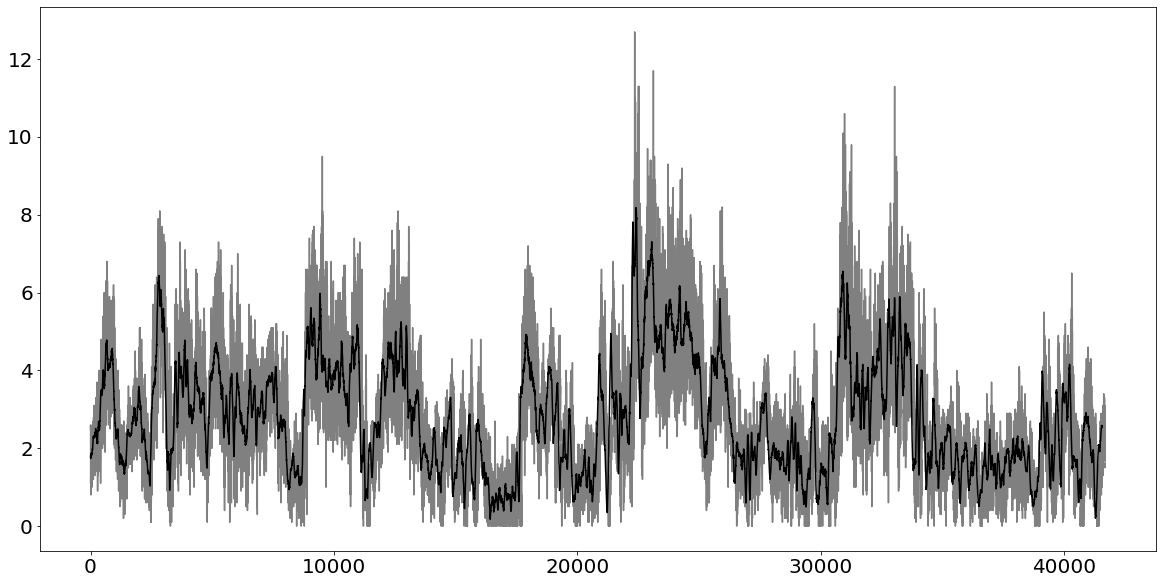

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(range(len(Merged_data)), Merged_data.loc[:,"풍속(m/s)"], c = 'gray')
plt.plot(range(len(MD.dropna())), MD.dropna().loc[:,"풍속(m/s)"], c = 'black')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);